http://outlace.com/rlpart1.html

In [3]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#armed bandits
n = 10
arms = np.random.rand(n)
eps=0.2


In [5]:
arms

array([ 0.35803352,  0.17123821,  0.75499325,  0.07901743,  0.24266824,
        0.83398918,  0.41605065,  0.8245212 ,  0.38547032,  0.85752985])

In [6]:
def reward(prob): #pretty convoluted way of doing expected dollar output
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward+=1
    return reward

In [41]:
av

array([[3, 0],
       [3, 1],
       [3, 2]])

In [42]:
av
a = av
for u in a:
    print (a[np.where(a[:,0] == u[0])])

[[3 0]
 [3 1]
 [3 2]]
[[3 0]
 [3 1]
 [3 2]]
[[3 0]
 [3 1]
 [3 2]]


In [45]:
#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm, bestMean = 0, 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:,1]) #calc mean reward for each iteration
            #u[0] is the most recent slot that has been pulled. we want to find the 
            #mean reward for choosing that slot from our history array
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm
                      

initial choice: 8


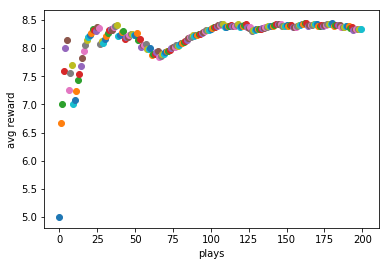

In [59]:
plt.xlabel("plays")
plt.ylabel('avg reward')
#initialize memory array with 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)),0]).reshape(1,2) #av = action value
print 'initial choice:', av[0][0]
for i in range(200):
    if i % 50 == 0:
        #print i,
        pass
    if random.random() > eps: #greedy arm selection
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        #print thisAV,
        av = np.concatenate((av, thisAV), axis=0)
    else:
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]])
        #rint thisAV,
        av = np.concatenate((av, thisAV), axis=0)
        pass
    #calc percentage the correct arm is chosen
    percCorret = 100*(len(av[np.where(av[:,0] == np.argmax(arms))])/len(av))
    
    #calc mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)